# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

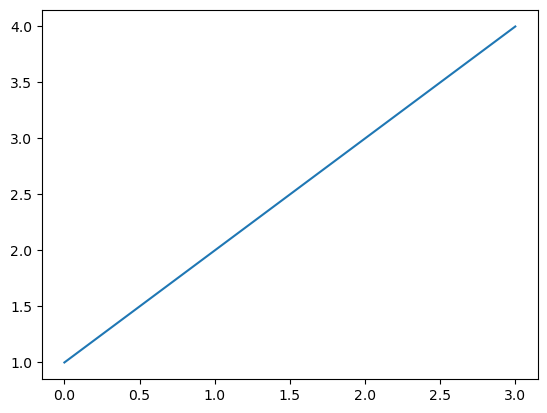

In [2]:
plt.plot([1, 2, 3, 4]);

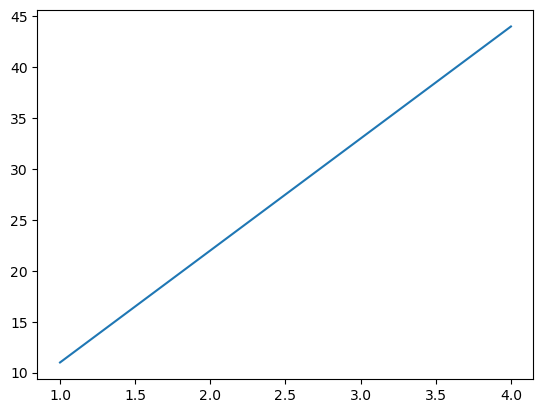

In [3]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x, y)

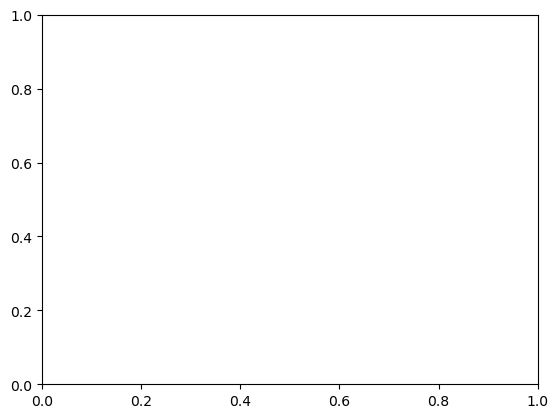

In [4]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

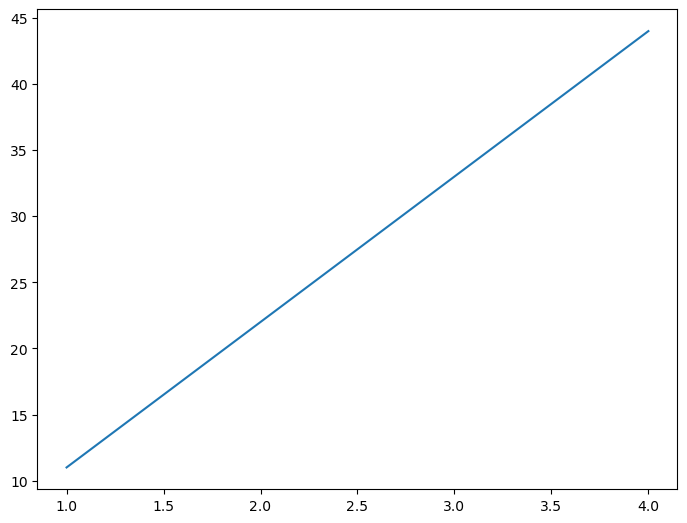

In [5]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) # add some data
plt.show()

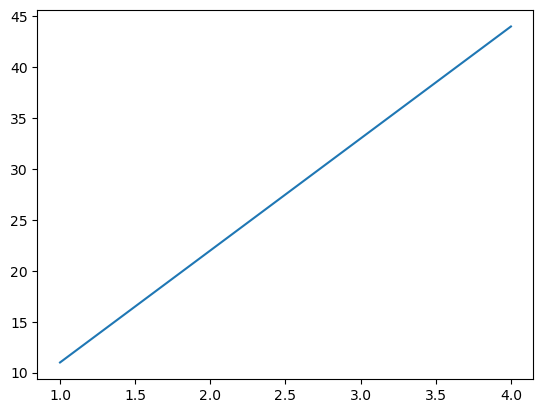

In [6]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data

In [7]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

# Matplotlib example workflow

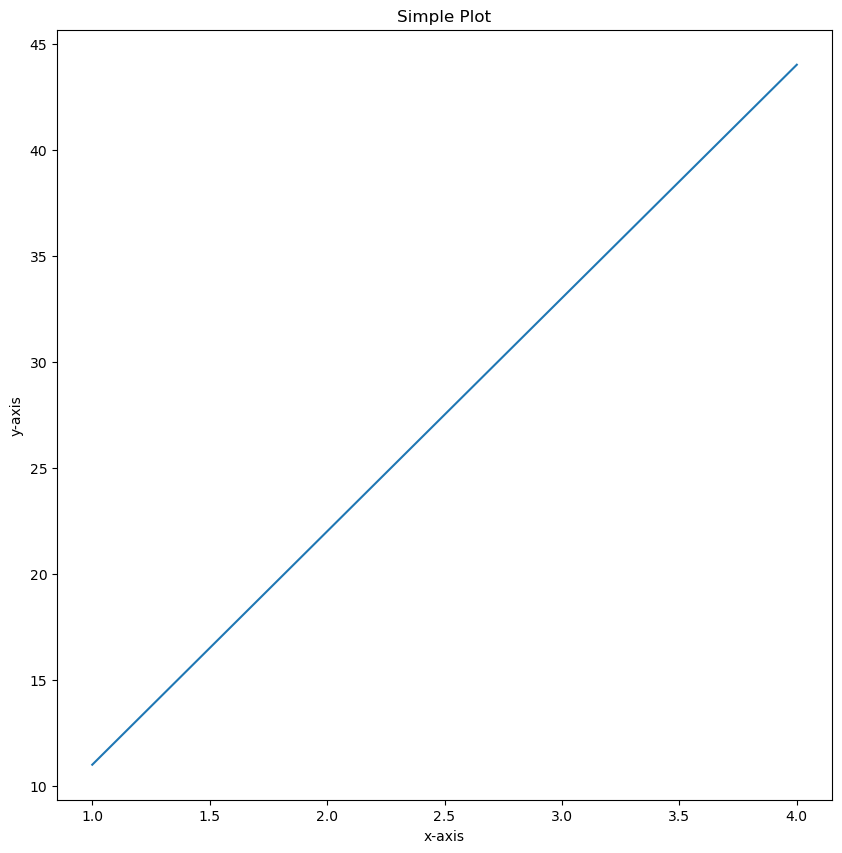

In [8]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("./sample-plot.png")


## Making figures with NumPy arrays

In [9]:
import numpy as np

In [10]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

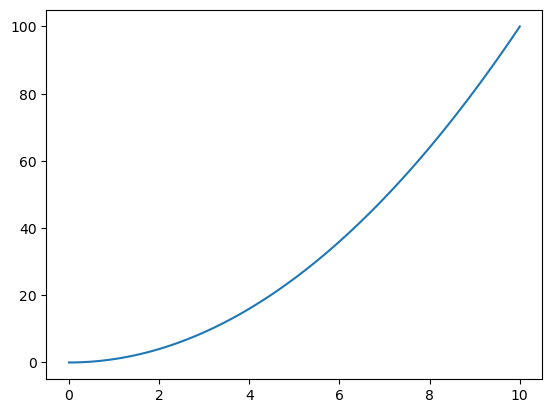

In [11]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

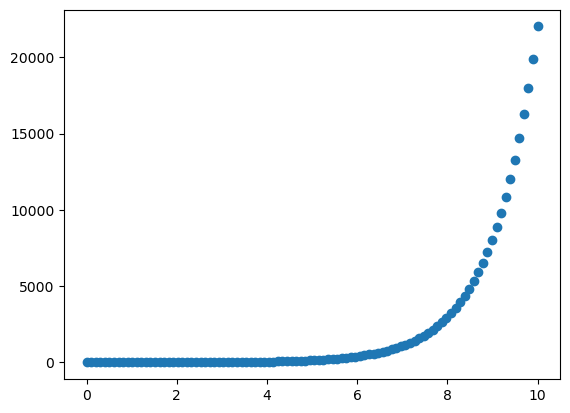

In [12]:
# Use same data to make a scatter
fix, ax = plt.subplots()
ax.scatter(x, np.exp(x))

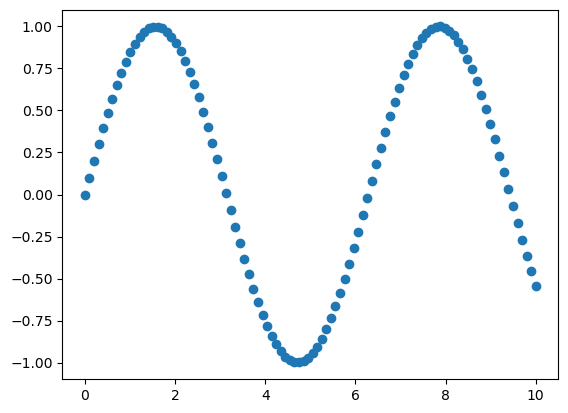

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

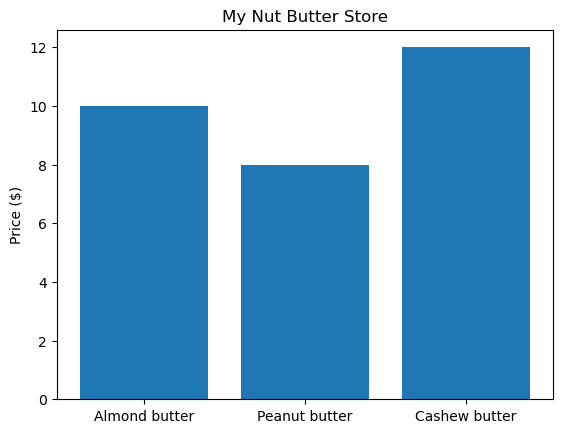

In [14]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values());
ax.set(title="My Nut Butter Store",
      ylabel="Price ($)");

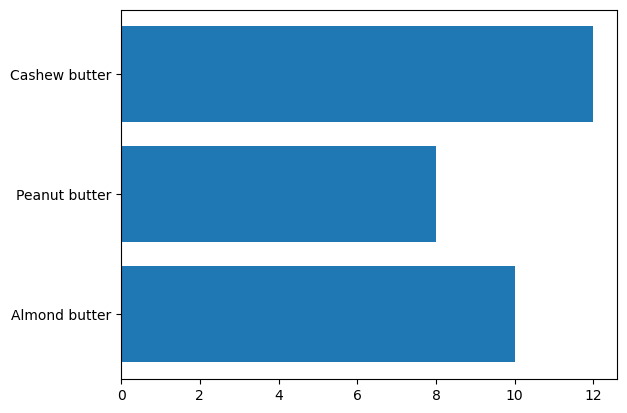

In [15]:
fig, ax = plt.subplots()
# type(nut_butter_prices.keys()), type(nut_butter_prices.values())
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

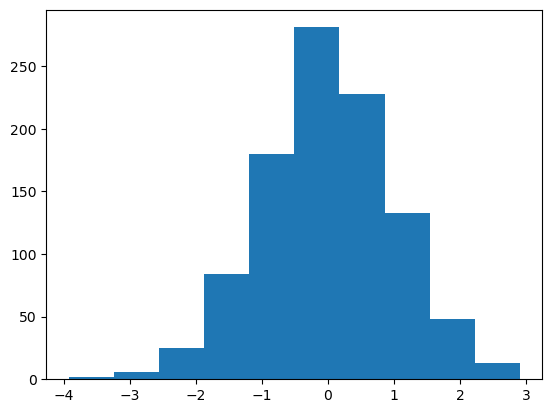

In [16]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

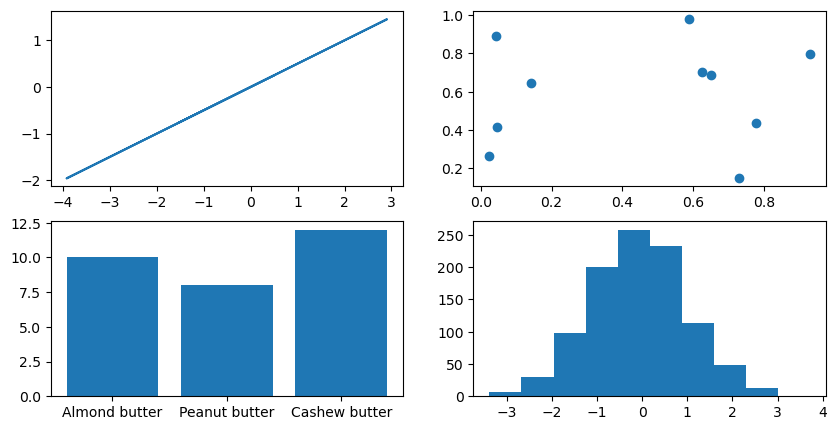

In [17]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

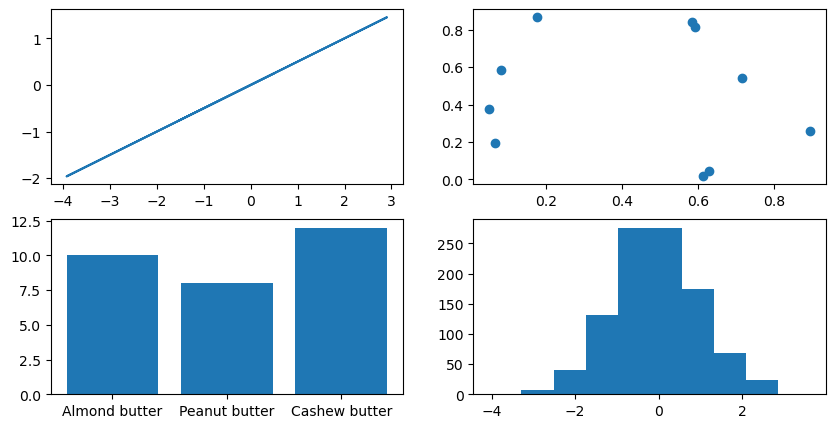

In [18]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10, 5))
# Plot to each different index
ax[0][0] == ax[0,0]
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

# Plotting from pandas DataFrame

In [19]:
import pandas as pd

In [20]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

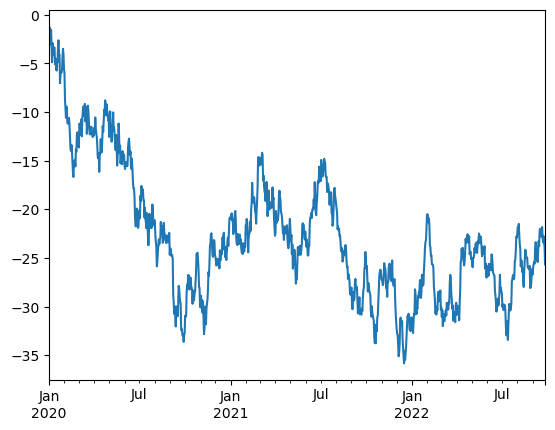

In [21]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [22]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [23]:
type(car_sales["Price"].str)

pandas.core.strings.accessor.StringMethods

In [24]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$,]', '', regex=True).astype(float)

In [25]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [26]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,2020-01-08
8,Toyota,White,60000,4,6250.0,2020-01-09
9,Nissan,White,31600,4,9700.0,2020-01-10


In [27]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2020-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2020-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2020-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2020-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2020-01-10,76450.0


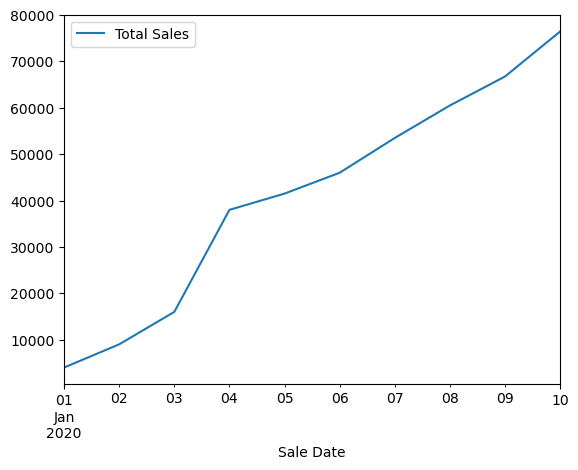

In [28]:
# Plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

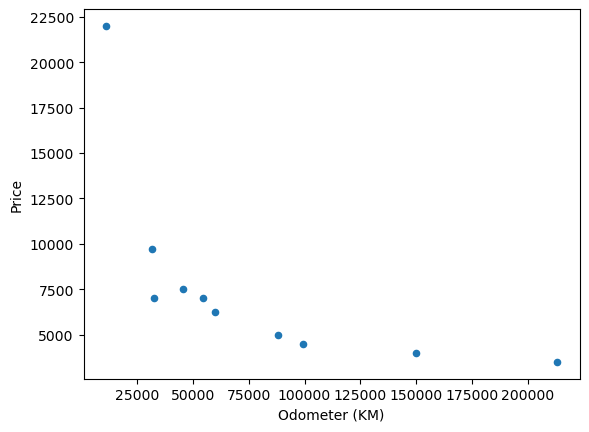

In [29]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [30]:
# Try bar graphs
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.650659,0.611655,0.438562,0.446414
1,0.704557,0.787623,0.285815,0.734950
2,0.243787,0.380727,0.417692,0.220287
3,0.794242,0.101863,0.091778,0.314707
4,0.940506,0.651591,0.527283,0.657390
5,0.800220,0.121597,0.244320,0.351843
6,0.953066,0.799852,0.392120,0.858186
7,0.386129,0.694905,0.167200,0.564692
8,0.798062,0.260298,0.177069,0.133624
9,0.370421,0.371881,0.338407,0.984547


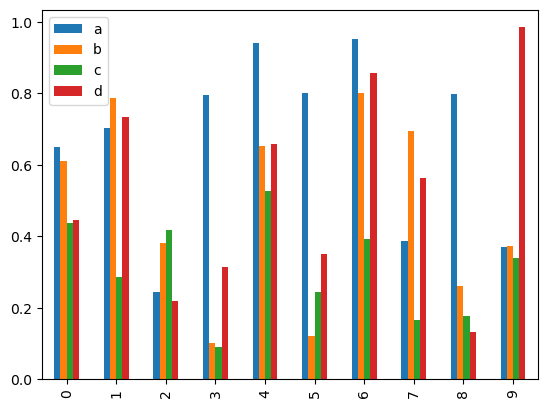

In [31]:
df.plot.bar();

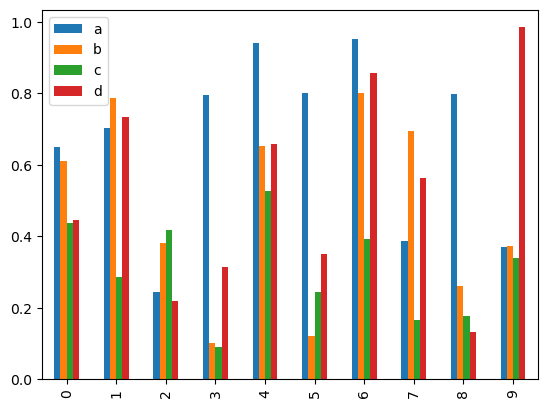

In [32]:
df.plot(kind="bar");

In [33]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2020-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2020-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2020-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2020-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2020-01-10,76450.0


<Axes: xlabel='Make'>

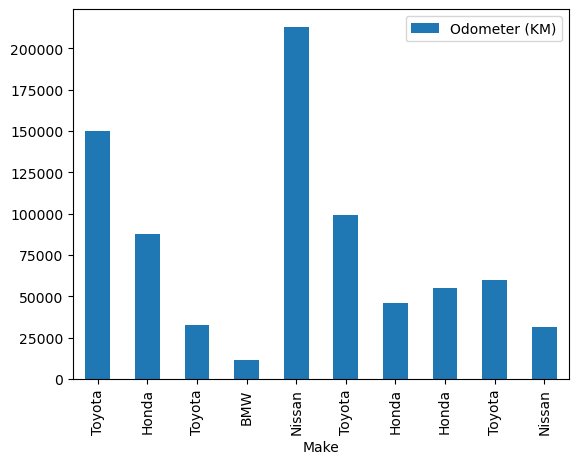

In [34]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")

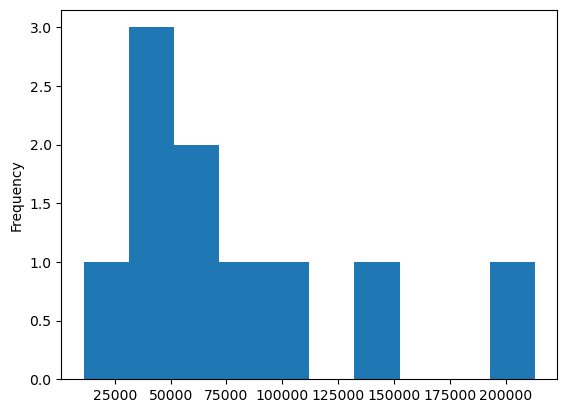

In [35]:
# Try histograms
car_sales["Odometer (KM)"].plot.hist();

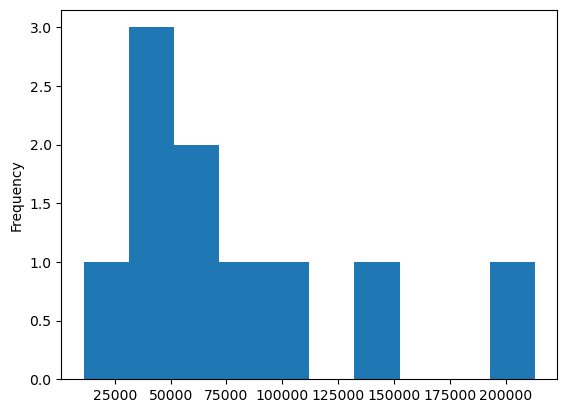

In [36]:
car_sales["Odometer (KM)"].plot(kind="hist", bins=10);

In [37]:
heart_disease = pd.read_csv("heart-disease.csv");
heart_disease.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


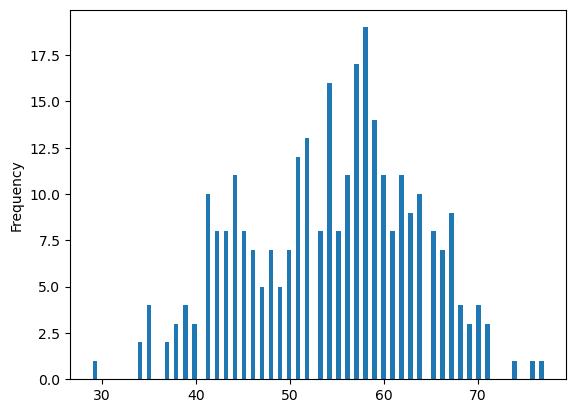

In [38]:
# Try on another dataset, loaded above
# Create a histogram of age
heart_disease["age"].plot.hist(bins=100);

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


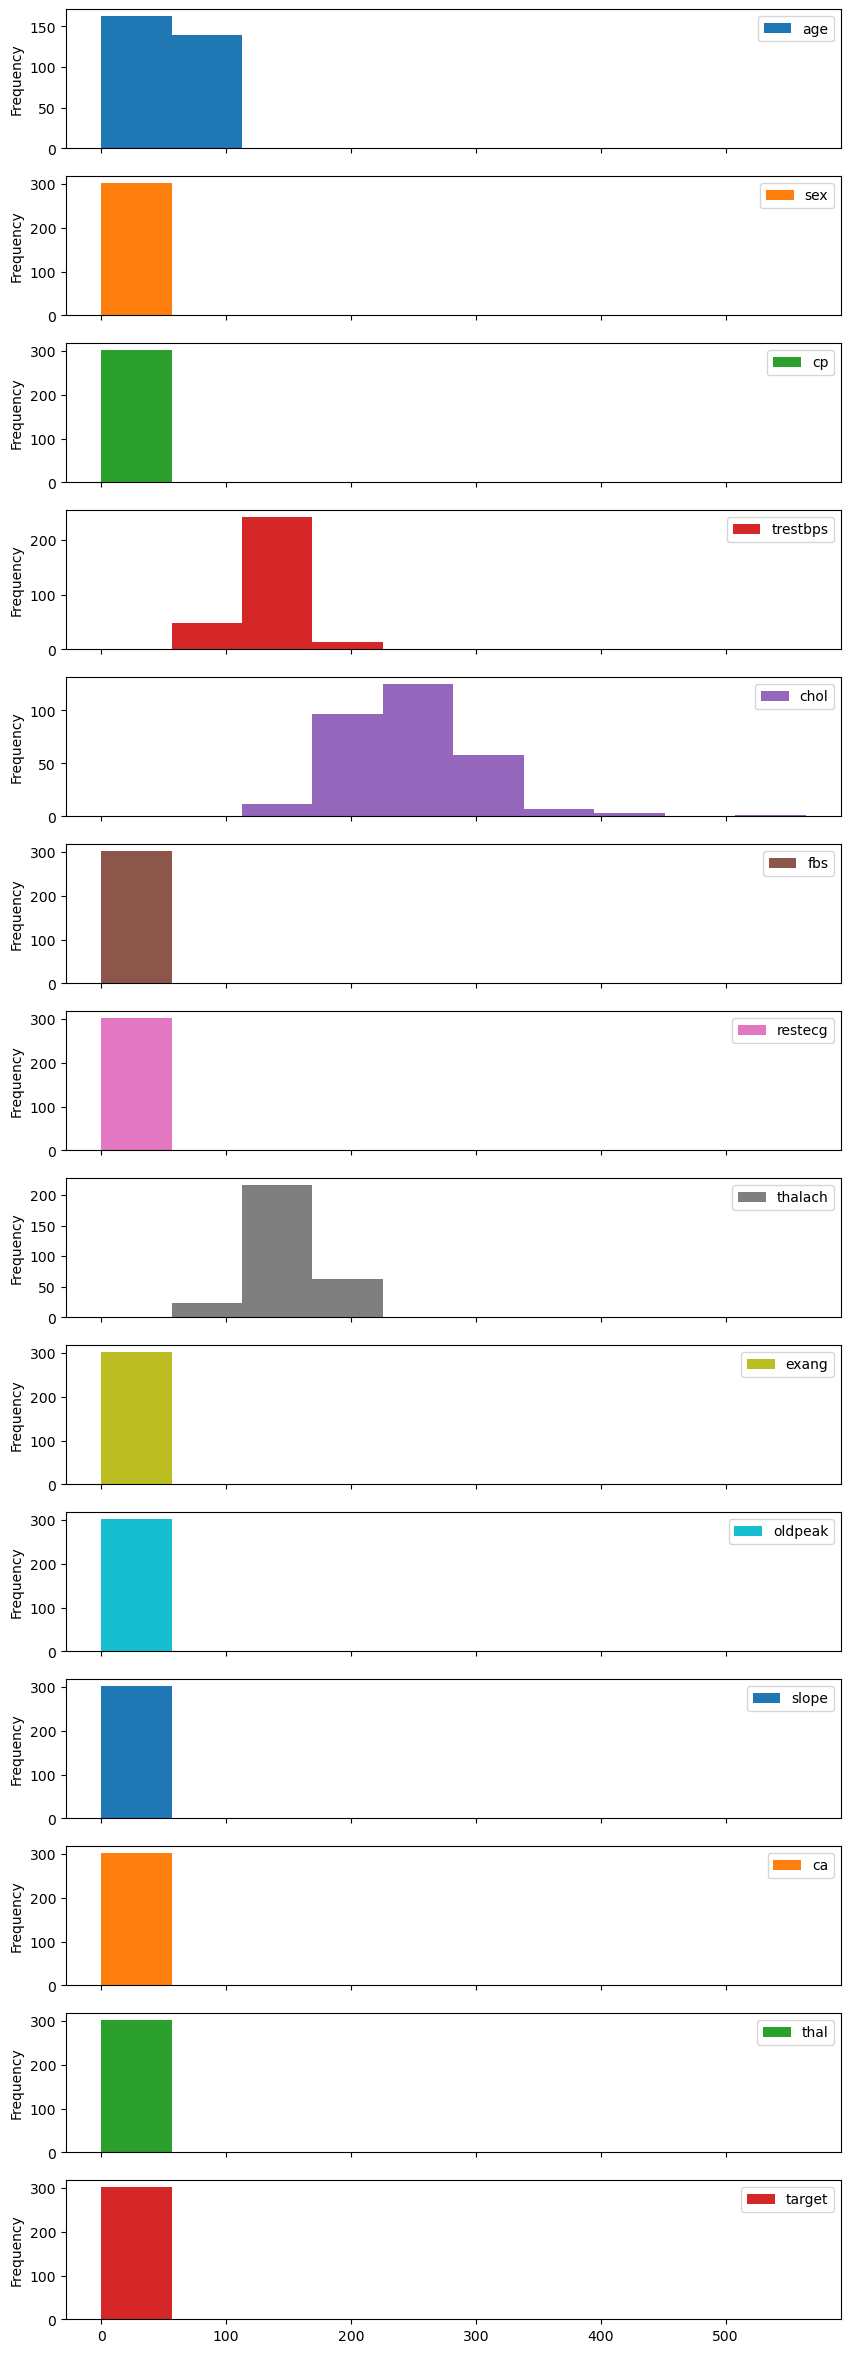

In [40]:
heart_disease.plot.hist(subplots=True, figsize=(10, 30));

### pyplot vs matplotlib oo method
* simple quick - pyplot
* usually advanced - OO method

In [41]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [42]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


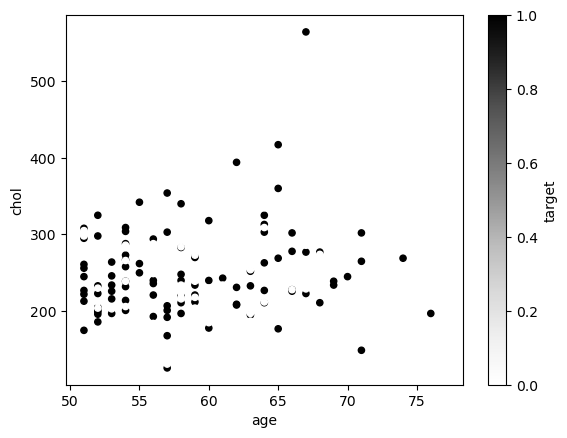

In [43]:
# pyplot method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

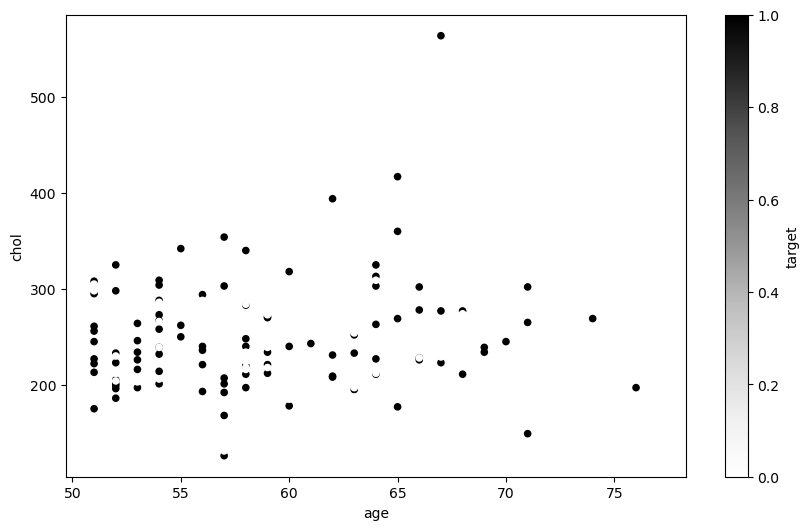

In [44]:
## OO method mixed with pyplot
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax);
# ax.set_xlim([45,100]);

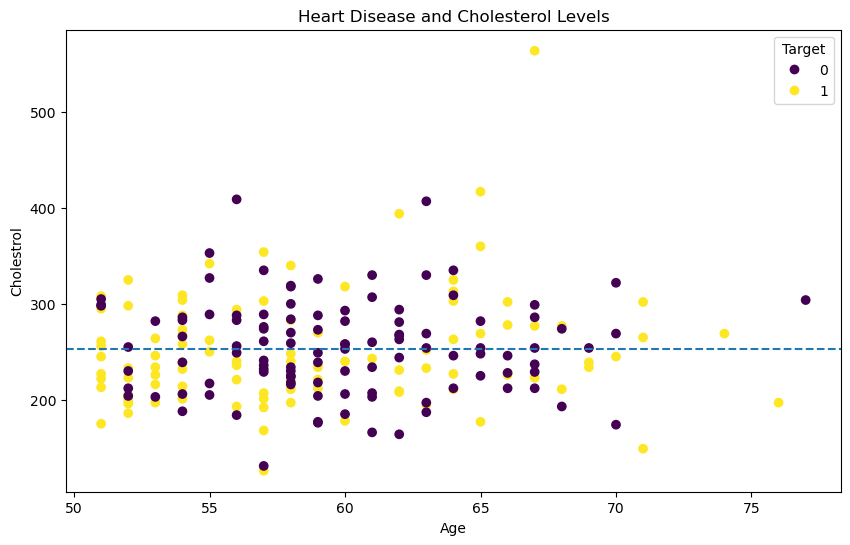

In [45]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"]);
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

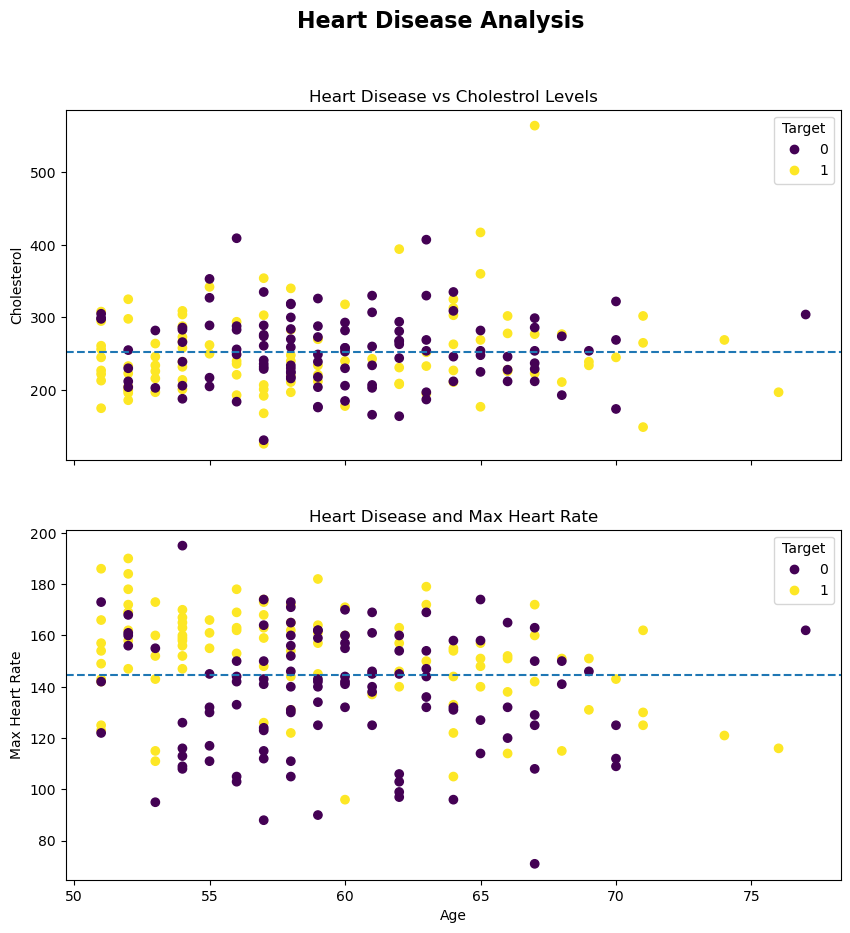

In [46]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);

# Customize ax0
ax0.set(title="Heart Disease vs Cholestrol Levels",
       ylabel="Cholesterol")
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"]);
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate");

# Add legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [47]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [48]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0


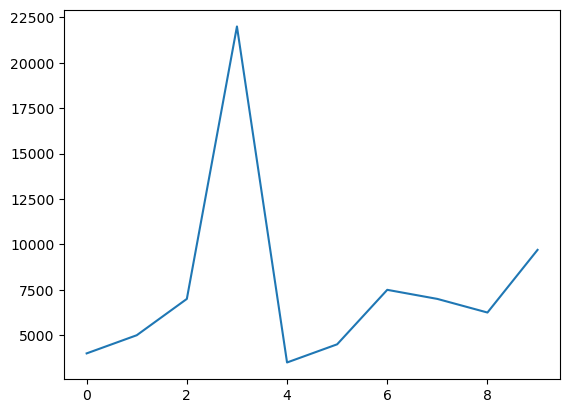

In [49]:
# Default style
car_sales["Price"].plot();

In [50]:
plt.style.use('seaborn-v0_8-whitegrid')

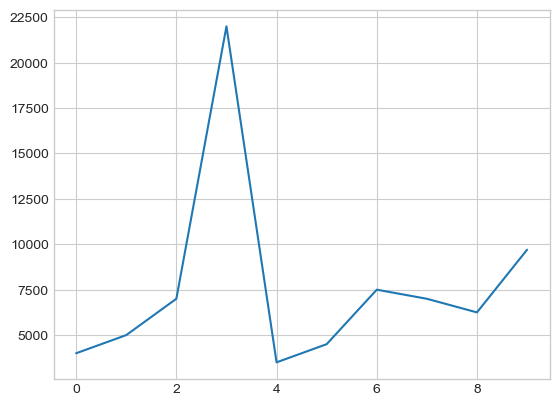

In [51]:
car_sales["Price"].plot();

In [52]:
plt.style.use("seaborn-v0_8")

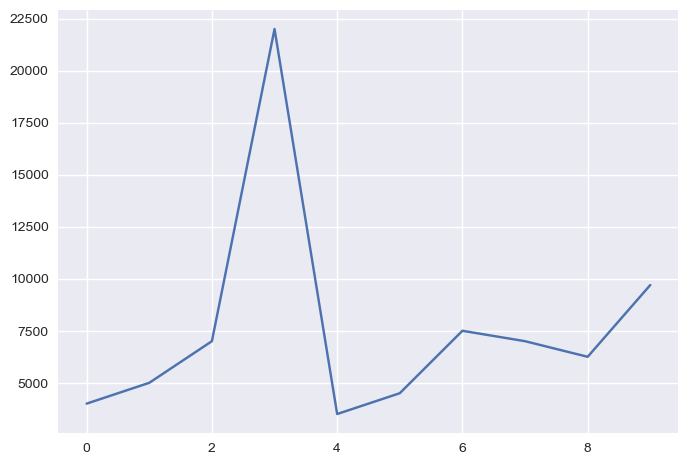

In [53]:
car_sales["Price"].plot();

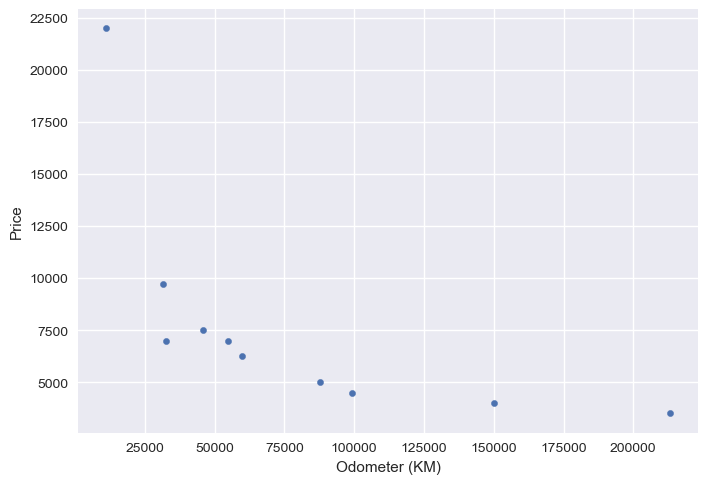

In [54]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [55]:
plt.style.use("ggplot")

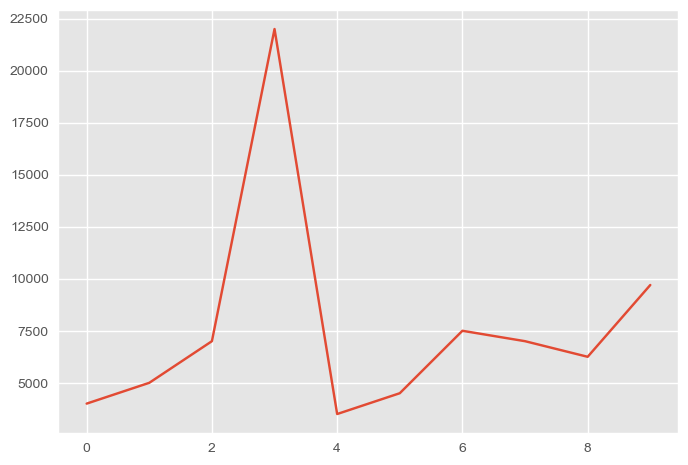

In [56]:
car_sales["Price"].plot();

In [57]:
# Create some dummy data
x = np.random.randn(10,4)
x

array([[-0.93170556, -0.13536429, -0.97563182, -0.42545561],
       [ 0.26872365,  0.14223291,  0.44451351, -0.70727743],
       [-1.50534933,  1.97658614, -0.29232512,  1.14789581],
       [ 0.2034663 ,  0.51698923,  0.42651164,  0.42854078],
       [-0.53064747,  0.54716605, -0.20053876, -1.03942829],
       [ 0.59633785, -1.00239099, -0.07680087,  0.30263819],
       [ 0.49431154, -1.07340262,  1.11683593,  0.2173939 ],
       [ 0.59791575, -2.13248591, -0.74018404, -2.51708409],
       [ 0.13607975,  0.24528396,  0.08498236,  0.98377469],
       [-0.9009027 ,  0.59004069, -0.09272075, -1.70506584]])

In [58]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.931706,-0.135364,-0.975632,-0.425456
1,0.268724,0.142233,0.444514,-0.707277
2,-1.505349,1.976586,-0.292325,1.147896
3,0.203466,0.516989,0.426512,0.428541
4,-0.530647,0.547166,-0.200539,-1.039428
5,0.596338,-1.002391,-0.076801,0.302638
6,0.494312,-1.073403,1.116836,0.217394
7,0.597916,-2.132486,-0.740184,-2.517084
8,0.136080,0.245284,0.084982,0.983775
9,-0.900903,0.590041,-0.092721,-1.705066


matplotlib.axes._axes.Axes

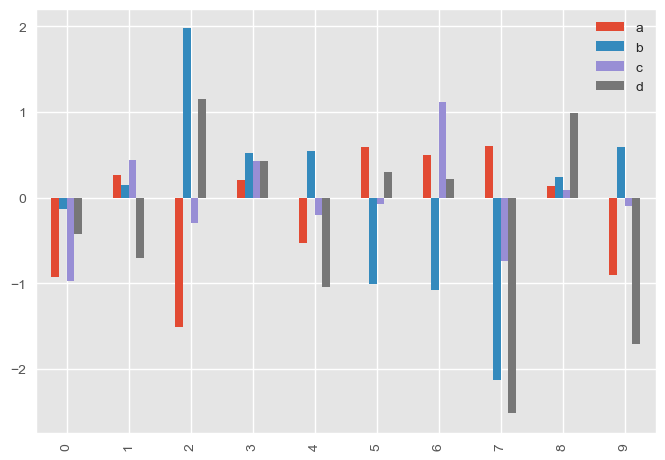

In [59]:
ax = df.plot(kind='bar')
type(ax)

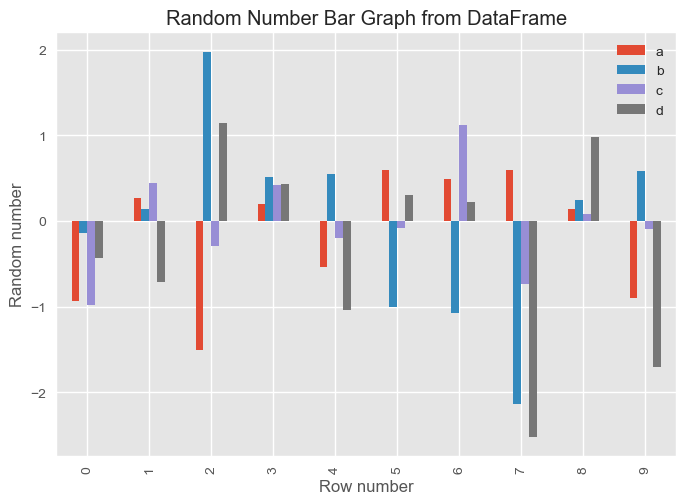

In [60]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row number",
      ylabel="Random number");
# Make the legend visible
ax.legend().set_visible(True);

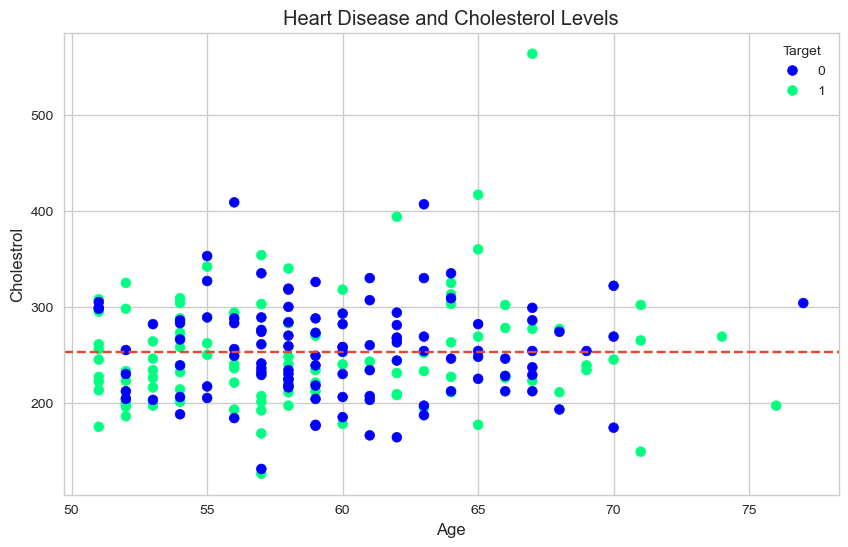

In [64]:
# Set the style
plt.style.use("seaborn-v0_8-whitegrid");

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"],
                    cmap="winter"); # this changes the color scheme
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

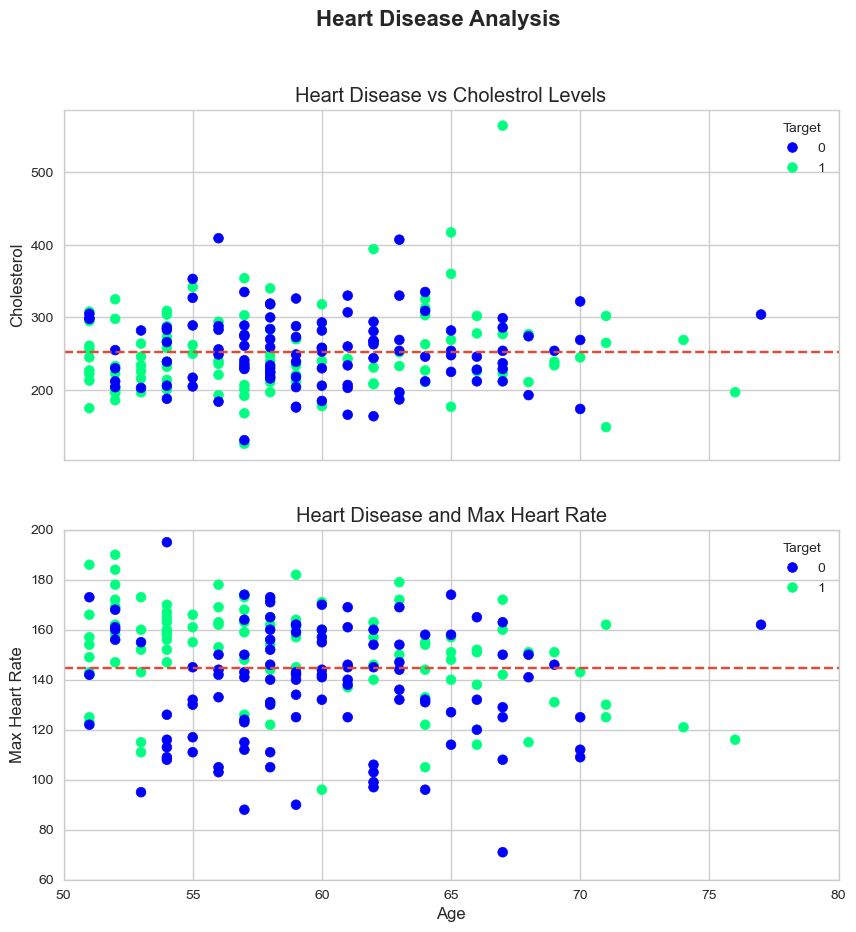

In [71]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter");

# Customize ax0
ax0.set(title="Heart Disease vs Cholestrol Levels",
       ylabel="Cholesterol")

# Change the x-axis limit
ax0.set_xlim([50, 80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter");
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate");

ax1.set_ylim([60, 200])

# Add legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");
# Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

In [72]:
fig.savefig("heart-disease-analysis-plot.png")